In [1]:
from pathlib import Path

import pandas as pd
import plotnine as pn

source_data = source_data = Path("output") / "source_data"

pd.set_option("display.max_rows", 10)

## General

In [2]:
n_archetype_to_color_map = {
    3: "#DBEAFE",  # Light blue (more blue than very light)
    4: "#93C5FD",  # Medium-light blue
    5: "#60A5FA",  # Medium blue
    6: "#2563EB",  # Blue
    7: "#1D4ED8",  # Dark blue
    8: "#1E3A8A",  # Very dark blue
}

optim_alg_to_color_map = {"frank_wolfe": "#DAA520", "projected_gradients": "#006400"}

init_alg_to_shape_map = {"furthest_sum": "o", "plus_plus": "^", "uniform": "s"}

## Figure 2

### Panel A

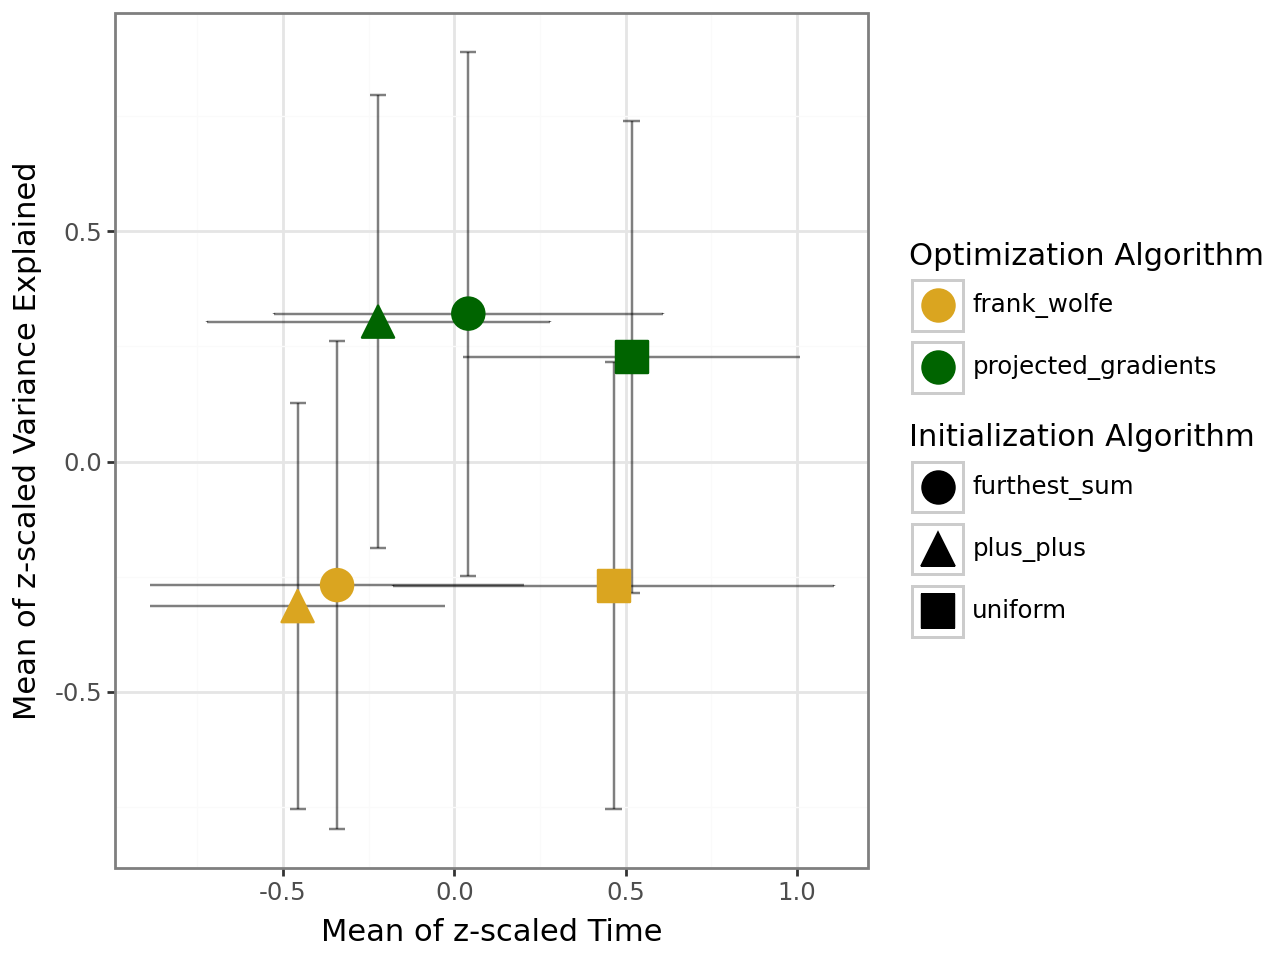

In [3]:
df = pd.read_csv(source_data / "figure_2_panel_A.csv")

df_summary_agg = (
    df.groupby(["init_alg", "optim_alg"])
    .aggregate({"varexpl_z_scaled": ["mean", "std"], "time_z_scaled": ["mean", "std"]})
    .reset_index()
)
df_summary_agg.columns = [
    "_".join(col).strip("_") for col in df_summary_agg.columns.values
]
df_summary_agg["varexpl_z_scaled_low"] = (
    df_summary_agg["varexpl_z_scaled_mean"] - df_summary_agg["varexpl_z_scaled_std"]
)
df_summary_agg["varexpl_z_scaled_high"] = (
    df_summary_agg["varexpl_z_scaled_mean"] + df_summary_agg["varexpl_z_scaled_std"]
)
df_summary_agg["time_z_scaled_low"] = (
    df_summary_agg["time_z_scaled_mean"] - df_summary_agg["time_z_scaled_std"]
)
df_summary_agg["time_z_scaled_high"] = (
    df_summary_agg["time_z_scaled_mean"] + df_summary_agg["time_z_scaled_std"]
)

p = (
    pn.ggplot(df)
    + pn.geom_errorbar(
        data=df_summary_agg,
        mapping=pn.aes(
            x="time_z_scaled_mean",
            ymin="varexpl_z_scaled_low",
            ymax="varexpl_z_scaled_high",
        ),
        alpha=0.5,
        width=0,
    )
    + pn.geom_errorbarh(
        data=df_summary_agg,
        mapping=pn.aes(
            y="varexpl_z_scaled_mean",
            xmin="time_z_scaled_low",
            xmax="time_z_scaled_high",
        ),
        alpha=0.5,
        height=0,
    )
    + pn.geom_point(
        data=df_summary_agg,
        mapping=pn.aes(
            x="time_z_scaled_mean",
            y="varexpl_z_scaled_mean",
            color="optim_alg",
            shape="init_alg",
        ),
        size=6,
    )
    + pn.scale_color_manual(values=optim_alg_to_color_map)
    + pn.scale_shape_manual(values=init_alg_to_shape_map)
    + pn.theme(figure_size=(6.5, 4))
    + pn.theme_bw()
    + pn.labs(
        x="Mean of z-scaled Time",
        y="Mean of z-scaled Variance Explained",
        color="Optimization Algorithm",
        shape="Initialization Algorithm",
    )
)
p.show()

### Panel B

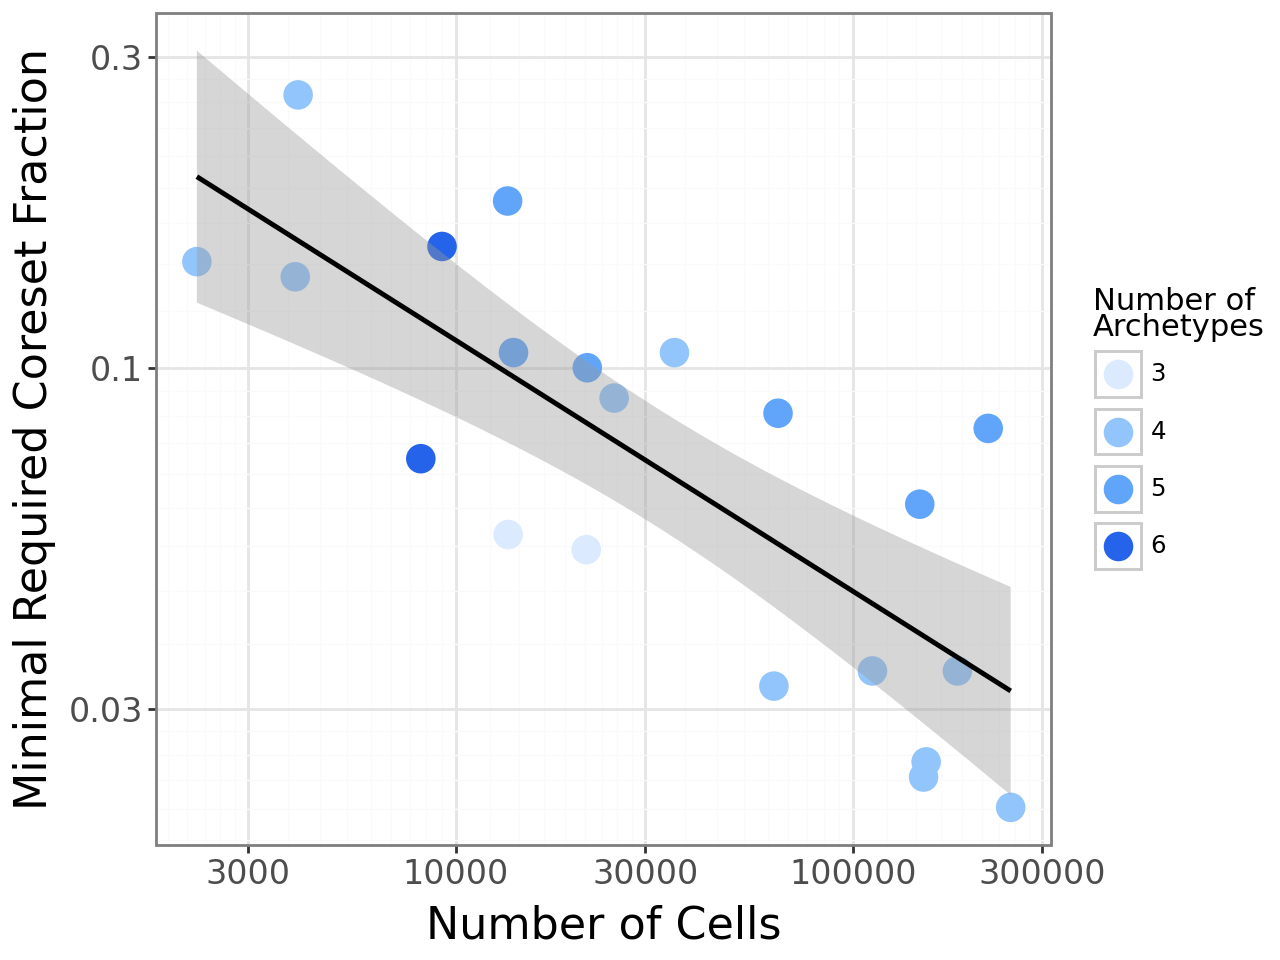

In [4]:
df = pd.read_csv(source_data / "figure_2_panel_B.csv")
df["n_archetypes"] = pd.Categorical(df["n_archetypes"])
p = (
    pn.ggplot(df, mapping=pn.aes(x="n_samples", y="coreset_size"))
    + pn.geom_point(pn.aes(color="n_archetypes"), size=5)
    + pn.geom_smooth(method="lm")
    + pn.scale_x_log10()
    + pn.scale_y_log10()
    + pn.labs(
        x="Number of Cells",
        y="Minimal Required Coreset Fraction",
        color="Number of\nArchetypes",
    )
    + pn.scale_color_manual(values=n_archetype_to_color_map)
    + pn.theme_bw()
    + pn.theme(axis_text=pn.element_text(size=12), axis_title=pn.element_text(size=16))
)
p.show()

### Panel C

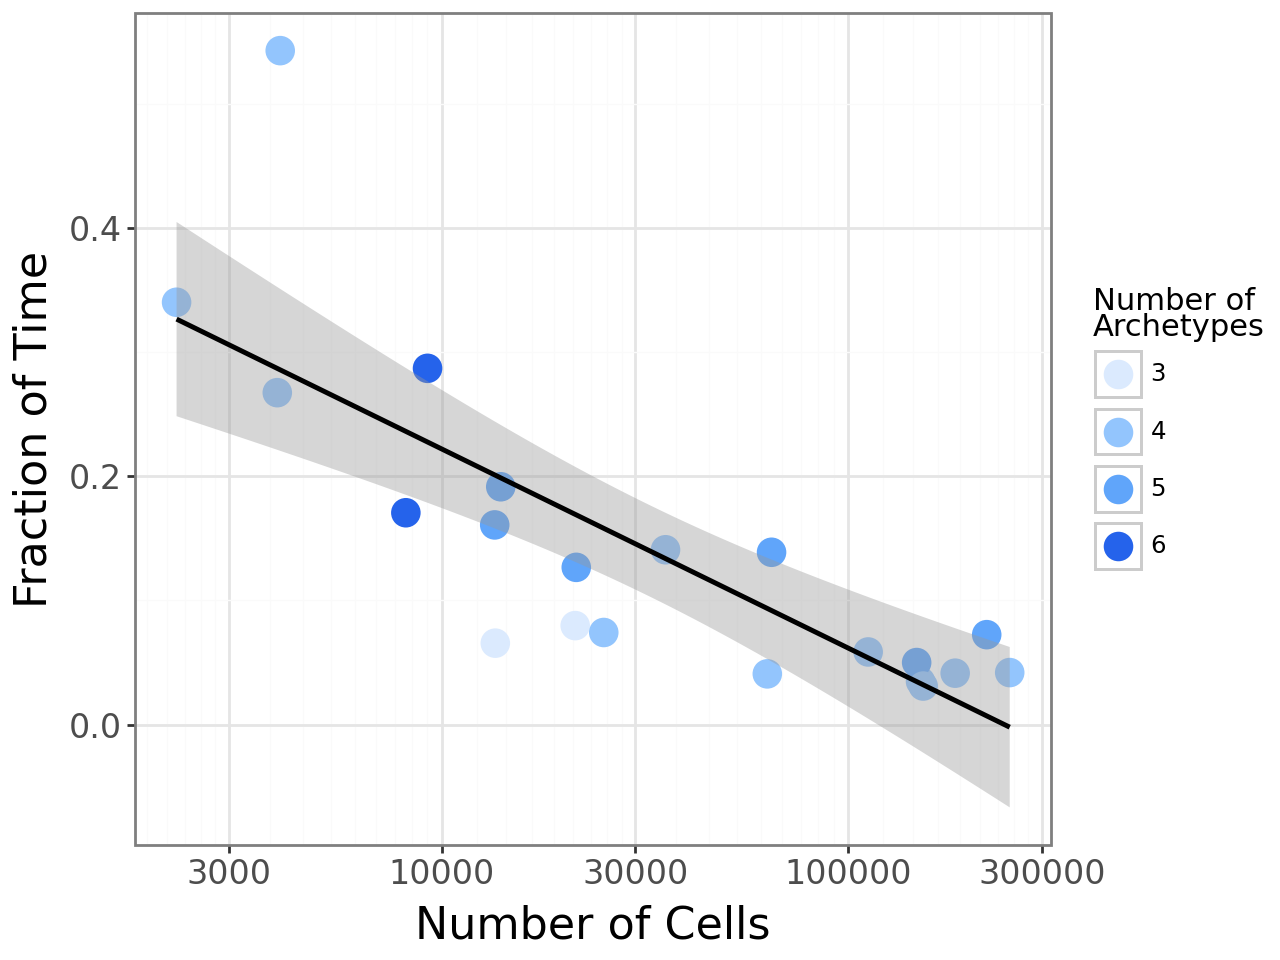

In [5]:
df = pd.read_csv(source_data / "figure_2_panel_C.csv")
df["n_archetypes"] = pd.Categorical(df["n_archetypes"])
p = (
    pn.ggplot(df, mapping=pn.aes(x="n_samples", y="time_fraction"))
    + pn.geom_point(pn.aes(color="n_archetypes"), size=5)
    + pn.geom_smooth(method="lm")
    + pn.scale_x_log10()
    + pn.labs(x="Number of Cells", y="Fraction of Time", color="Number of\nArchetypes")
    + pn.scale_color_manual(values=n_archetype_to_color_map)
    + pn.theme_bw()
    + pn.theme(axis_text=pn.element_text(size=12), axis_title=pn.element_text(size=16))
)
p.show()

## Figure 3

### Panel A

In [6]:
pd.read_csv(source_data / "figure_3_panel_A.csv")

,k,n_archetypes,n_restarts,seed,varexpl,IC,RSS
0,2,2,5,42,0.505389,3999.470572,2966.183594
1,3,3,5,42,0.780369,4031.792129,1317.129150
2,4,4,5,42,0.933718,4350.171098,397.492065
3,5,5,5,42,0.968795,5018.088698,187.138931
4,6,6,5,42,0.986980,5595.782319,78.079063
5,7,7,5,42,0.990249,6455.393444,58.477367
6,8,8,5,42,0.992305,7322.744558,46.145992


### Panel B

In [7]:
pd.read_csv(source_data / "figure_3_panel_A.csv")

,k,n_archetypes,n_restarts,seed,varexpl,IC,RSS
0,2,2,5,42,0.505389,3999.470572,2966.183594
1,3,3,5,42,0.780369,4031.792129,1317.129150
2,4,4,5,42,0.933718,4350.171098,397.492065
3,5,5,5,42,0.968795,5018.088698,187.138931
4,6,6,5,42,0.986980,5595.782319,78.079063
5,7,7,5,42,0.990249,6455.393444,58.477367
6,8,8,5,42,0.992305,7322.744558,46.145992


### Panel C

In [8]:
pd.read_csv(source_data / "figure_3_panel_C_part_1.csv")

,X_pca_0,X_pca_1
0,-2.712639,-2.995948
1,0.658155,-2.454385
2,3.420507,0.163377
3,5.822504,1.468965
4,4.228241,-3.539652
...,...,...
1994,-3.811829,-2.622687
1995,-3.844973,-1.657379
1996,-3.834235,3.038017
1997,-2.465467,-1.536682


In [9]:
pd.read_csv(source_data / "figure_3_panel_C_part_2.csv")

,X_pca_0,X_pca_1,X_pca_2,archetype,iter,reference,mean_variance,variance_per_archetype
0,-4.256970,4.861796,-0.410647,0,1,False,0.070182,0.062698
1,3.567502,-1.936841,-5.124300,1,1,False,0.070182,0.090415
2,-3.179478,-3.821946,1.089830,2,1,False,0.070182,0.053955
3,7.800270,0.980882,3.163259,3,1,False,0.070182,0.073660
4,-4.219980,4.877916,-0.419863,0,2,False,0.070182,0.062698
...,...,...,...,...,...,...,...,...
199,6.958010,1.993351,3.376123,3,50,False,0.070182,0.073660
200,-4.184073,4.893556,-0.428807,0,0,True,0.070182,0.062698
201,3.421843,-2.006085,-5.227480,1,0,True,0.070182,0.090415
202,-3.179478,-3.821946,1.089830,2,0,True,0.070182,0.053955


### Panel D

In [10]:
pd.read_csv(source_data / "figure_3_panel_D.csv")

,X_pca_0,X_pca_1,weights_archetype_0,weights_archetype_1,weights_archetype_2,weights_archetype_3
0,-2.712639,-2.995948,0.000094,0.000148,0.001194,0.000004
1,0.658155,-2.454385,0.000069,0.000405,0.000986,0.000209
2,3.420507,0.163377,0.000021,0.002422,0.000020,0.000075
3,5.822504,1.468965,0.000008,0.000080,0.000009,0.002917
4,4.228241,-3.539652,0.000003,0.002087,0.000106,0.000308
...,...,...,...,...,...,...
1994,-3.811829,-2.622687,0.000113,0.000027,0.001245,0.000002
1995,-3.844973,-1.657379,0.000235,0.000031,0.001155,0.000003
1996,-3.834235,3.038017,0.001677,0.000026,0.000129,0.000002
1997,-2.465467,-1.536682,0.000247,0.000124,0.001094,0.000012


### Panel E

In [11]:
pd.read_csv(source_data / "figure_3_panel_E.csv")

,Process,0,1,2,3,specificity,act_0,pval_0,act_1,pval_1,act_2,pval_2,act_3,pval_3,neg_log10_pval_0,neg_log10_pval_1,neg_log10_pval_2,neg_log10_pval_3
0,BIOSYNTHESIS_OF_MARESIN_LIKE_SPMS,19.231075,-0.078473,-17.586111,-3.196429,19.309548,19.231075,8.617068e-78,-0.078473,9.985252e-01,-17.586111,4.072016e-65,-3.196429,3.391075e-02,77.064640,NaN,NaN,NaN
1,BIOSYNTHESIS_OF_MARESINS,18.358042,-0.281575,-16.458202,-3.232033,18.639617,18.358042,3.092423e-71,-0.281575,9.985252e-01,-16.458202,2.481751e-57,-3.232033,3.195796e-02,70.509701,NaN,NaN,NaN
2,BIOSYNTHESIS_OF_SPECIALIZED_PRORESOLVING_MEDIA...,15.946504,-0.927757,-13.981154,-2.447268,16.874261,15.946504,5.281133e-54,-0.927757,9.069605e-01,-13.981154,1.641584e-41,-2.447268,1.382757e-01,53.277273,NaN,NaN,NaN
3,SYNTHESIS_OF_EPOXY_EET_AND_DIHYDROXYEICOSATRIE...,15.050248,-0.076273,-13.456374,-2.898154,15.126521,15.050248,3.060557e-48,-0.076273,9.985252e-01,-13.456374,1.459164e-38,-2.898154,6.645872e-02,47.514199,NaN,NaN,NaN
4,SYNTHESIS_OF_16_20_HYDROXYEICOSATETRAENOIC_ACI...,12.154429,0.057726,-10.380083,-3.079531,12.096703,12.154429,1.624693e-31,0.057726,9.985252e-01,-10.380083,3.746338e-23,-3.079531,4.617593e-02,30.789229,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,THE_CANONICAL_RETINOID_CYCLE_IN_RODS_TWILIGHT_...,-5.949127,4.276665,-2.626185,6.987614,2.710948,-5.949127,8.070208e-08,4.276665,8.767564e-04,-2.626185,1.171004e-01,6.987614,3.898834e-10,NaN,NaN,NaN,9.409065
36,PLASMA_LIPOPROTEIN_REMODELING,-7.829051,9.686680,-5.030619,6.797452,-2.889228,-7.829051,2.858172e-13,9.686680,4.358084e-20,-5.030619,1.491496e-05,6.797452,1.263143e-09,NaN,NaN,NaN,8.898547
37,DETOXIFICATION_OF_REACTIVE_OXYGEN_SPECIES,0.500611,-1.898349,-4.027222,6.753542,6.252931,0.500611,9.980677e-01,-1.898349,5.324829e-01,-4.027222,1.228943e-03,6.753542,1.495033e-09,NaN,NaN,NaN,8.825349
38,VLDL_ASSEMBLY,-0.946746,1.969309,-5.450659,6.286746,4.317437,-0.946746,9.980677e-01,1.969309,4.796037e-01,-5.450659,1.909726e-06,6.286746,2.939227e-08,NaN,NaN,NaN,7.531767


### Panel F

In [12]:
pd.read_csv(source_data / "figure_3_panel_F.csv")

,x,y,archetype,score
0,6441.638931,6784.892093,archetype_0,1.585776
1,5273.085976,6038.359804,archetype_0,0.610568
2,6128.098076,7342.552861,archetype_0,-0.937637
3,5316.723368,6701.344984,archetype_0,0.339186
4,7163.156397,6768.488695,archetype_0,-1.479489
...,...,...,...,...
58643,5720.153199,7496.879302,archetype_3,0.294670
58644,6150.671305,7061.812055,archetype_3,1.167768
58645,6848.739002,7617.406461,archetype_3,-0.147249
58646,6282.492831,7455.139323,archetype_3,-0.279111


## Figure 4

### Panel B

In [23]:
pd.read_csv(source_data / "figure_4_panel_B.csv")

,X_pca_harmony_0,X_pca_harmony_1,disease
0,1.391453,-0.682752,NF
1,2.929481,0.076558,NF
2,2.281496,-2.125291,NF
3,1.041384,-3.048121,NF
4,2.620402,-1.515809,NF
...,...,...,...
147214,-0.170734,-0.588884,NF
147215,1.205217,-0.392223,NF
147216,-0.296449,-1.816189,NF
147217,2.198950,1.378826,NF


### Panel C

In [24]:
pd.read_csv(source_data / "figure_4_panel_C_part_1.csv")

,sex,disease,donor_id,pc_0,pc_1,pc_2
0,male,NF,P1622,1.082771,-0.181649,-0.528954
1,male,CM,P1422,-0.001697,0.309652,0.127380
2,male,CM,P1722,-0.180654,-0.040512,0.201129
3,male,CM,P1462,0.144723,0.192670,0.034706
4,female,NF,P1558,1.270514,-0.169956,-0.634826
...,...,...,...,...,...,...
37,female,NF,P1539,1.226371,0.071002,-0.590402
38,female,CM,P1726,0.015581,0.389469,0.123947
39,male,CM,P1504,-0.075606,-0.119067,0.135070
40,male,CM,P1472,0.107915,0.154980,0.052626


In [25]:
pd.read_csv(source_data / "figure_4_panel_C_part_2.csv")

,pc_0,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9,pc_10,pc_11,pc_12,pc_13,pc_14,pc_15,archetype
0,0.281897,3.839423,0.248913,-0.418647,0.274859,0.034895,0.053028,0.086958,-0.010155,0.037614,0.111576,-0.028819,-0.098293,-0.080706,0.102056,0.361418,0
1,2.777881,-2.137078,-1.650020,0.045971,-0.046156,0.086595,-0.069084,-0.169312,0.234932,0.013612,0.023030,0.043828,0.001084,-0.006070,0.002500,0.001154,1
2,-3.025475,-1.660589,1.689737,0.540600,-0.360684,-0.407721,0.084847,0.420686,-0.461087,0.115479,-0.153481,0.053156,0.042653,0.294220,-0.032539,-0.326870,2


In [26]:
pd.read_csv(source_data / "figure_4_panel_C_part_3.csv")

,pc_0,pc_1
0,-3.025475,-1.660589
1,2.777881,-2.137078
2,0.281897,3.839423
3,-3.025475,-1.660589


### Panel D

In [27]:
pd.read_csv(source_data / "figure_4_panel_D_part_1.csv")

,donor_id,disease,variable,value,variable_clean
0,P1622,NF,dist_to_arch_0,4.216699,Archetype 0
1,P1422,CM,dist_to_arch_0,3.606727,Archetype 0
2,P1722,CM,dist_to_arch_0,3.982192,Archetype 0
3,P1462,CM,dist_to_arch_0,3.716531,Archetype 0
4,P1558,NF,dist_to_arch_0,4.262885,Archetype 0
...,...,...,...,...,...
121,P1539,NF,dist_to_arch_2,5.269513,Archetype 2
122,P1726,CM,dist_to_arch_2,4.109553,Archetype 2
123,P1504,CM,dist_to_arch_2,3.781395,Archetype 2
124,P1472,CM,dist_to_arch_2,4.092965,Archetype 2


In [28]:
pd.read_csv(source_data / "figure_4_panel_D_part_2.csv")

,variable_clean,label,y
0,Archetype 0,p=3.7e-07,4.551884
1,Archetype 1,p=4.5e-22,4.734332
2,Archetype 2,p=1.2e-20,5.523302


### Panel E

In [29]:
pd.read_csv(source_data / "figure_4_panel_E.csv")

,archetype,gene,log1p,raw,z_scaled
0,0,ADAMTSL3,0.677226,1.661175,0.210307
1,0,COL12A1,0.379754,0.858156,-0.017477
2,0,COL15A1,0.769013,1.939652,0.309555
3,0,COL1A1,0.131400,0.265196,-0.043527
4,0,COL4A1,0.664068,1.767258,0.124963
...,...,...,...,...,...
58,2,SMOC2,0.666802,1.870172,0.078639
59,2,TGFBR2,0.264310,0.516698,-0.207111
60,2,TGFBR3,0.297761,0.664389,-0.223141
61,2,TNC,0.121794,0.517331,0.177403


### Panel F

In [30]:
pd.read_csv(source_data / "figure_4_panel_F.csv")

,archetype,TF,t_value,p_value
0,0,CEBPB,-1.475715,4.257678e-01
1,1,CEBPB,7.629428,4.194660e-12
2,2,CEBPB,-3.958337,3.472444e-03
3,0,ERF,3.697409,6.484253e-03
4,1,ERF,-1.734635,2.126541e-01
...,...,...,...,...
49,1,SRF,0.187007,9.228182e-01
50,2,SRF,4.503994,7.631550e-04
51,0,TWIST1,-3.781098,5.092057e-03
52,1,TWIST1,-1.383587,3.467044e-01


### Panel G

In [31]:
pd.read_csv(source_data / "figure_4_panel_G.csv")

,archetype,matrisome_set,t_value,p_value
0,0,BASEMENT_MEMBRANES,11.161537,7.560340e-28
1,1,BASEMENT_MEMBRANES,-0.339805,7.340069e-01
2,2,BASEMENT_MEMBRANES,-5.864408,1.143462e-08
3,0,COLLAGENS,5.076779,1.935575e-06
4,1,COLLAGENS,-6.227748,4.820248e-09
...,...,...,...,...
25,1,PROTEOGLYCANS,-2.910231,1.205118e-02
26,2,PROTEOGLYCANS,4.104180,6.787663e-05
27,0,SECRETED_FACTORS,-4.232953,7.720238e-05
28,1,SECRETED_FACTORS,0.930390,4.955897e-01


## EV Figure 1

### Panel A

In [13]:
pd.read_csv(source_data / "EV_1_panel_A.csv")

,k,n_archetypes,n_restarts,seed,varexpl,IC,RSS
0,2,2,5,42,0.505389,3999.470572,2966.183594
1,3,3,5,42,0.780369,4031.792129,1317.129150
2,4,4,5,42,0.933718,4350.171098,397.492065
3,5,5,5,42,0.968795,5018.088698,187.138931
4,6,6,5,42,0.986980,5595.782319,78.079063
5,7,7,5,42,0.990249,6455.393444,58.477367
6,8,8,5,42,0.992305,7322.744558,46.145992


### Panel B

In [14]:
pd.read_csv(source_data / "EV_1_panel_B.csv")

,X_pca_0,X_pca_1,X_pca_2,archetype,iter,reference,mean_variance,variance_per_archetype
0,-4.256970,4.861796,-0.410647,0,1,False,0.070182,0.062698
1,3.567502,-1.936841,-5.124300,1,1,False,0.070182,0.090415
2,-3.179478,-3.821946,1.089830,2,1,False,0.070182,0.053955
3,7.800270,0.980882,3.163259,3,1,False,0.070182,0.073660
4,-4.219980,4.877916,-0.419863,0,2,False,0.070182,0.062698
...,...,...,...,...,...,...,...,...
199,6.958010,1.993351,3.376123,3,50,False,0.070182,0.073660
200,-4.184073,4.893556,-0.428807,0,0,True,0.070182,0.062698
201,3.421843,-2.006085,-5.227480,1,0,True,0.070182,0.090415
202,-3.179478,-3.821946,1.089830,2,0,True,0.070182,0.053955


### Panel C

In [15]:
pd.read_csv(source_data / "EV_1_panel_C.csv")

,ligand,receptor,ligand_z_score,ligand_specificity_score,receptor_z_score,receptor_specificity_score,sender_archetype,receiver_archetype
0,Serpina7,Slc16a2,0.199268,0.211117,0.098133,0.068470,0,0
1,Angptl4,Sdc1,0.081796,0.092883,0.157726,0.221464,0,2
2,Angptl4,Sdc2,0.081796,0.092883,0.059659,0.079642,0,2
3,Lpl,Sdc1,0.306364,0.339712,0.157726,0.221464,0,2
4,Gnai2,Adora1,0.131358,0.112456,0.074121,0.098256,0,2
...,...,...,...,...,...,...,...,...
51,B2m,Tfrc,0.356020,0.183745,0.052578,0.078079,3,2
52,Apoa1,Ldlr,0.885900,0.135862,0.091400,0.079206,3,2
53,Apoa2,Ldlr,0.957675,0.160867,0.091400,0.079206,3,2
54,Mif,Egfr,0.448749,0.429463,0.084232,0.070469,3,2


### Panel D

In [16]:
pd.read_csv(source_data / "EV_1_panel_D.csv")

,X_pca_0,X_pca_1,weights_archetype_0,weights_archetype_1,weights_archetype_2,weights_archetype_3
0,-2.712639,-2.995948,0.000094,0.000148,0.001194,0.000004
1,0.658155,-2.454385,0.000069,0.000405,0.000986,0.000209
2,3.420507,0.163377,0.000021,0.002422,0.000020,0.000075
3,5.822504,1.468965,0.000008,0.000080,0.000009,0.002917
4,4.228241,-3.539652,0.000003,0.002087,0.000106,0.000308
...,...,...,...,...,...,...
1994,-3.811829,-2.622687,0.000113,0.000027,0.001245,0.000002
1995,-3.844973,-1.657379,0.000235,0.000031,0.001155,0.000003
1996,-3.834235,3.038017,0.001677,0.000026,0.000129,0.000002
1997,-2.465467,-1.536682,0.000247,0.000124,0.001094,0.000012


### Panel E

In [17]:
pd.read_csv(source_data / "EV_1_panel_E.csv")

,Process,0,1,2,3,specificity,act_0,pval_0,act_1,pval_1,act_2,pval_2,act_3,pval_3,neg_log10_pval_0,neg_log10_pval_1,neg_log10_pval_2,neg_log10_pval_3
0,BIOSYNTHESIS_OF_MARESIN_LIKE_SPMS,19.231075,-0.078473,-17.586111,-3.196429,19.309548,19.231075,8.617068e-78,-0.078473,9.985252e-01,-17.586111,4.072016e-65,-3.196429,3.391075e-02,77.064640,NaN,NaN,NaN
1,BIOSYNTHESIS_OF_MARESINS,18.358042,-0.281575,-16.458202,-3.232033,18.639617,18.358042,3.092423e-71,-0.281575,9.985252e-01,-16.458202,2.481751e-57,-3.232033,3.195796e-02,70.509701,NaN,NaN,NaN
2,BIOSYNTHESIS_OF_SPECIALIZED_PRORESOLVING_MEDIA...,15.946504,-0.927757,-13.981154,-2.447268,16.874261,15.946504,5.281133e-54,-0.927757,9.069605e-01,-13.981154,1.641584e-41,-2.447268,1.382757e-01,53.277273,NaN,NaN,NaN
3,SYNTHESIS_OF_EPOXY_EET_AND_DIHYDROXYEICOSATRIE...,15.050248,-0.076273,-13.456374,-2.898154,15.126521,15.050248,3.060557e-48,-0.076273,9.985252e-01,-13.456374,1.459164e-38,-2.898154,6.645872e-02,47.514199,NaN,NaN,NaN
4,SYNTHESIS_OF_16_20_HYDROXYEICOSATETRAENOIC_ACI...,12.154429,0.057726,-10.380083,-3.079531,12.096703,12.154429,1.624693e-31,0.057726,9.985252e-01,-10.380083,3.746338e-23,-3.079531,4.617593e-02,30.789229,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,THE_CANONICAL_RETINOID_CYCLE_IN_RODS_TWILIGHT_...,-5.949127,4.276665,-2.626185,6.987614,2.710948,-5.949127,8.070208e-08,4.276665,8.767564e-04,-2.626185,1.171004e-01,6.987614,3.898834e-10,NaN,NaN,NaN,9.409065
36,PLASMA_LIPOPROTEIN_REMODELING,-7.829051,9.686680,-5.030619,6.797452,-2.889228,-7.829051,2.858172e-13,9.686680,4.358084e-20,-5.030619,1.491496e-05,6.797452,1.263143e-09,NaN,NaN,NaN,8.898547
37,DETOXIFICATION_OF_REACTIVE_OXYGEN_SPECIES,0.500611,-1.898349,-4.027222,6.753542,6.252931,0.500611,9.980677e-01,-1.898349,5.324829e-01,-4.027222,1.228943e-03,6.753542,1.495033e-09,NaN,NaN,NaN,8.825349
38,VLDL_ASSEMBLY,-0.946746,1.969309,-5.450659,6.286746,4.317437,-0.946746,9.980677e-01,1.969309,4.796037e-01,-5.450659,1.909726e-06,6.286746,2.939227e-08,NaN,NaN,NaN,7.531767


### Panel F

In [18]:
pd.read_csv(source_data / "EV_1_panel_F.csv")

,x,y,archetype,score
0,6441.638931,6784.892093,archetype_0,1.585776
1,5273.085976,6038.359804,archetype_0,0.610568
2,6128.098076,7342.552861,archetype_0,-0.937637
3,5316.723368,6701.344984,archetype_0,0.339186
4,7163.156397,6768.488695,archetype_0,-1.479489
...,...,...,...,...
58643,5720.153199,7496.879302,archetype_3,0.294670
58644,6150.671305,7061.812055,archetype_3,1.167768
58645,6848.739002,7617.406461,archetype_3,-0.147249
58646,6282.492831,7455.139323,archetype_3,-0.279111


## EV Figure 2

### Panel A

In [39]:
pd.read_csv(source_data / "EV_2_panel_A.csv")

,component,variance_unshuffled,variance_shuffled_mean,variance_shuffled_std,variance_shuffled_mean+std,variance_shuffled_mean-std,included
0,0,4.975977,0.925862,0.000093,0.925955,0.925768,True
1,1,2.399712,0.723585,0.000222,0.723807,0.723363,True
2,2,1.602771,0.690500,0.000289,0.690789,0.690211,True
3,3,1.329095,0.674291,0.000315,0.674605,0.673976,True
4,4,1.203306,0.655310,0.000622,0.655932,0.654688,True
...,...,...,...,...,...,...,...
45,45,0.297576,0.337898,0.001663,0.339561,0.336235,False
46,46,0.295020,0.334384,0.002293,0.336676,0.332091,False
47,47,0.290389,0.329806,0.002899,0.332704,0.326907,False
48,48,0.289145,0.324723,0.001601,0.326324,0.323122,False


### Panel B

In [40]:
pd.read_csv(source_data / "EV_2_panel_B.csv")

,k,n_archetypes,n_restarts,seed,varexpl,IC,RSS
0,2,2,5,42,0.203129,61127.354096,1.888928e+06
1,3,3,5,42,0.339511,51817.832648,1.565636e+06
2,4,4,5,42,0.416755,48765.036003,1.382532e+06
3,5,5,5,42,0.484389,51570.808931,1.222211e+06
4,6,6,5,42,0.526802,54696.983116,1.121674e+06
5,7,7,5,42,0.561516,58640.730301,1.039393e+06


### Panel C

In [41]:
pd.read_csv(source_data / "EV_2_panel_C.csv")

,k,n_archetypes,n_restarts,seed,varexpl,IC,RSS
0,2,2,5,42,0.203129,61127.354096,1.888928e+06
1,3,3,5,42,0.339511,51817.832648,1.565636e+06
2,4,4,5,42,0.416755,48765.036003,1.382532e+06
3,5,5,5,42,0.484389,51570.808931,1.222211e+06
4,6,6,5,42,0.526802,54696.983116,1.121674e+06
5,7,7,5,42,0.561516,58640.730301,1.039393e+06


### Panel D

In [42]:
pd.read_csv(source_data / "EV_2_panel_D.csv")

,X_pca_harmony_0,X_pca_harmony_1,X_pca_harmony_2,X_pca_harmony_3,X_pca_harmony_4,X_pca_harmony_5,X_pca_harmony_6,X_pca_harmony_7,X_pca_harmony_8,X_pca_harmony_9,...,X_pca_harmony_12,X_pca_harmony_13,X_pca_harmony_14,X_pca_harmony_15,archetype,iter,reference,mean_variance,variance_per_archetype,n_archetypes
0,2.431516,-1.269603,-1.357753,-0.064408,-0.009328,0.066281,-0.064605,-0.156975,0.160176,-0.013566,...,-0.027757,-0.026636,0.045993,0.059765,0,1,False,0.001197,0.000973,2
1,-1.588898,1.111884,1.055095,0.100183,-0.050731,-0.199064,0.074921,0.321572,-0.221070,0.096472,...,-0.027628,0.116584,0.004517,-0.008502,1,1,False,0.001197,0.001420,2
2,2.195060,-1.127906,-1.210260,-0.044662,0.008104,0.072267,-0.055501,-0.134172,0.135177,-0.001387,...,-0.029224,-0.020169,0.053281,0.062020,0,2,False,0.001197,0.000973,2
3,-1.813735,1.275654,1.195148,0.095918,-0.049511,-0.208997,0.081732,0.345695,-0.240769,0.101690,...,-0.032984,0.127514,0.000728,-0.013623,1,2,False,0.001197,0.001420,2
4,2.211373,-1.113291,-1.217681,-0.030545,0.005294,0.055554,-0.065986,-0.123180,0.136618,0.000710,...,-0.026201,-0.014323,0.052779,0.059381,0,3,False,0.001197,0.000973,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1372,-1.471693,3.484410,0.200450,0.437479,-0.019788,1.280261,0.428489,1.218018,0.515187,-0.901589,...,-0.383699,0.002437,-0.061374,0.204762,2,0,True,0.264662,0.306603,7
1373,0.863422,3.018551,0.833120,-0.780806,0.119032,-1.547273,0.152756,-0.775194,-0.423204,0.958383,...,0.313073,-0.206424,0.021931,0.509008,3,0,True,0.264662,0.167418,7
1374,-3.745523,-1.958078,2.840277,0.383486,1.021538,0.382247,-0.107092,-0.174705,-0.872059,0.580369,...,0.289192,0.409247,0.413836,-0.611790,4,0,True,0.264662,0.105863,7
1375,1.553800,-2.028946,-2.637987,-0.298932,3.565176,-0.765110,1.609200,-0.118854,-0.111799,0.102898,...,0.106323,-0.137224,-0.253429,-0.318325,5,0,True,0.264662,0.495020,7


### Panel E

In [43]:
pd.read_csv(source_data / "EV_2_panel_E.csv")

,X_pca_harmony_0,X_pca_harmony_1,X_pca_harmony_2,X_pca_harmony_3,X_pca_harmony_4,X_pca_harmony_5,X_pca_harmony_6,X_pca_harmony_7,X_pca_harmony_8,X_pca_harmony_9,...,X_pca_harmony_12,X_pca_harmony_13,X_pca_harmony_14,X_pca_harmony_15,archetype,iter,reference,mean_variance,variance_per_archetype,n_archetypes
0,2.431516,-1.269603,-1.357753,-0.064408,-0.009328,0.066281,-0.064605,-0.156975,0.160176,-0.013566,...,-0.027757,-0.026636,0.045993,0.059765,0,1,False,0.001197,0.000973,2
1,-1.588898,1.111884,1.055095,0.100183,-0.050731,-0.199064,0.074921,0.321572,-0.221070,0.096472,...,-0.027628,0.116584,0.004517,-0.008502,1,1,False,0.001197,0.001420,2
2,2.195060,-1.127906,-1.210260,-0.044662,0.008104,0.072267,-0.055501,-0.134172,0.135177,-0.001387,...,-0.029224,-0.020169,0.053281,0.062020,0,2,False,0.001197,0.000973,2
3,-1.813735,1.275654,1.195148,0.095918,-0.049511,-0.208997,0.081732,0.345695,-0.240769,0.101690,...,-0.032984,0.127514,0.000728,-0.013623,1,2,False,0.001197,0.001420,2
4,2.211373,-1.113291,-1.217681,-0.030545,0.005294,0.055554,-0.065986,-0.123180,0.136618,0.000710,...,-0.026201,-0.014323,0.052779,0.059381,0,3,False,0.001197,0.000973,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1372,-1.471693,3.484410,0.200450,0.437479,-0.019788,1.280261,0.428489,1.218018,0.515187,-0.901589,...,-0.383699,0.002437,-0.061374,0.204762,2,0,True,0.264662,0.306603,7
1373,0.863422,3.018551,0.833120,-0.780806,0.119032,-1.547273,0.152756,-0.775194,-0.423204,0.958383,...,0.313073,-0.206424,0.021931,0.509008,3,0,True,0.264662,0.167418,7
1374,-3.745523,-1.958078,2.840277,0.383486,1.021538,0.382247,-0.107092,-0.174705,-0.872059,0.580369,...,0.289192,0.409247,0.413836,-0.611790,4,0,True,0.264662,0.105863,7
1375,1.553800,-2.028946,-2.637987,-0.298932,3.565176,-0.765110,1.609200,-0.118854,-0.111799,0.102898,...,0.106323,-0.137224,-0.253429,-0.318325,5,0,True,0.264662,0.495020,7


### Panel F

In [44]:
pd.read_csv(source_data / "EV_2_panel_F.csv")

,X_pca_harmony_0,X_pca_harmony_1,disease
0,1.391453,-0.682752,NF
1,2.929481,0.076558,NF
2,2.281496,-2.125291,NF
3,1.041384,-3.048121,NF
4,2.620402,-1.515809,NF
...,...,...,...
147214,-0.170734,-0.588884,NF
147215,1.205217,-0.392223,NF
147216,-0.296449,-1.816189,NF
147217,2.198950,1.378826,NF


### Panel G

In [45]:
pd.read_csv(source_data / "EV_2_panel_G.csv")

,X_pca_harmony_0,X_pca_harmony_1,disease
0,1.391453,-0.682752,NF
1,2.929481,0.076558,NF
2,2.281496,-2.125291,NF
3,1.041384,-3.048121,NF
4,2.620402,-1.515809,NF
...,...,...,...
147214,-0.170734,-0.588884,NF
147215,1.205217,-0.392223,NF
147216,-0.296449,-1.816189,NF
147217,2.198950,1.378826,NF
